# FEATURE GENERATION AND SELECTION

# VARIABLES VS FEATURES
* Variables are the raw data from your dataset.
* Features are what ultimately gets fed into your model.
* You may use variables as features, or transform your variables.  Usually a combination of both.

# REASONS FOR FEATURE GENERATION
* Reduce dimensionality.
* Help the model capture complex signals.

# METHODS OF FEATURE GENERATION
* Domain Knowledge: Combine variables, grouping, etc.
* Filter Based Methods: Use statistical measures to determine which features are more predictive of the target.
* Algorithmic Methods: Clustering and PCA.

# FEATURE SELECTION
* Once you have generated your features - you begin the feature selection process.
* Define Feature Selection as the process of selecting a subset of features to train the model with.
* There are 3 general approaches (Can use any combination of some or all):

**Subject Matter Expertise:**
* Use domain knowledge to remove nonsensical features as well as features that will be highly correlated.

**Filter Based Techniques:**
* Uses statistical tests to determine a subset of features with high predicive power.

**Algorithmic Methods:**
* Involve feature selection as part of the model itself (Embedded Methods).
* Analyze the structure of a fitted model to understand the most important features.

**Challenge:**
* Unlimited combination of features to choose from.
* Performance of features depends on the model and combination of variables.
* Typically several iterations before settling on final model.

# FILTER BASED TECHNIQUES


**CORRELATION**  
* **Pearson:** $r = \rho_{x,y} = COV(X,Y)/\sigma_x \sigma_y $
* Measures strength of LINEAR relationship between variables.
* **Kendall:**  Kendall's Rank ; Kendall's Tau. Measures relationship between rankings of ordinal variables.
* Tests how one variable increases/decreases as the other variable does.  Relationship does not have to be linear.
* **Spearman:** Like Kendall - but magnitude is considered.
* Kendall and Spearman's are designed for non-parametric and non-normal data (unlike Pearson's).  

* Outliers impact Pearson more than Kendall and Spearman.

Rule of Thumb:  Correlation value of 50% or more wih the target variable suggests a possible predictive relationship.  Can also be used as a relative value when initially filtering your feature set.

**Calculate (Pearson) correlation with Target Variable for all Numeric Predictor Variables.**

In [42]:
data.diamonds <- diamonds %>%
    select(-c(cut,color,clarity))

b.Pearson <- cor(data.diamonds, method = "pearson")[ ,c("price")]
b.Pearson <- sort(b.Pearson, decreasing = TRUE)
b.Pearson

price        pred       carat           x           y           z 
 1.00000000  0.92232069  0.92159130  0.88443516  0.86542090  0.86124944 
      table       depth      target 
 0.12713390 -0.01064740 -0.09717538

**MUTUAL INFORMATION**  
* Measures the contribution of a variable toward reducing uncertainty about the value of another variable.
* Useful in feature selection: maximizes mutual info between joint distribution of training variables and target in datasets with many dimensions.
* Many variations of the mutual information score.  
* **Entropy:**$=\sum_{x,y} p(x,y)log\frac{p(x,y)}{p(x)p(y)}$

* Values are for relative purposes - not useful in an absolute sense.

**MINIMUM REDUNDANCY MAXIMUM RELEVANCE METHOD**
* Select variables that have high correlation with the target and low mutual info with other variables.

**Chi Square Test**
* $X^2=\sum_{i=1}^{m} \sum_{j=1}^{n}\frac{(O_{ij}-E_{ij})}{E_{i,j}}$ 
* Test for independence.
* Primarily used for Classification Models.

# ALGORITHMIC METHODS

**Regularization**
* Add a penalty term to your objective function (Goodness of Fit measure you are trying to minimize).  Penalty for more parameters.
* Want to avoid overly complex models that don't generalize well.
* Begin by covering 3 types of regularized regression.
* Note: Important to standardize data when using regularized regression.

**Ridge Regression**
* $\sum_{m=1}^{M} \beta^2_m$
* Will not reduce coefficients to zero.

**Lasso Regression**
* $\sum_{m=1}^{M} |\beta_m|$
* Can be used for feature selection (can reduce coefficients to zero).

**Elastic Net Regression**
* $\sum_{m=1}^{M} \beta^2_m$ + $\alpha\sum_{m=1}^{M} |\beta_m|$
* Alpha: (0 < alpha < 1) mixing coefficient - determines relative weight of ridge and lasso.

**Hyperparameter Tuning**
* Alpha and Lambda from regularized regression are examples of hyperparameters.  Parameters that are part of the algorithm used to generate the final model.  
* Hyperparameter tuning is the process of optimizing the hyperparameters.

# TREE BASED MODELS AND VARIABLE IMPORTANCE

**BRIEF SUMMARY OF TREE BASED MODELS**
* Random forest models all include decision tree variants.
* Decision trees identify optimal data splits - based on definition of optimal.
* Splits continue until threshold reached and no more information can be gained.
* Allows us to investigate non-linear relationships.

**VARIABLE IMPORTANCE**
* Easy to run a random forest. 
* Inspect variable importance plots for insights into potential features in your GLM.

# TRAIN AND VALIDATE

Basic Concept:  Before submitting a model for approval - you want to see how well it performs on data that was not used in model development.  The process of developing your model is referred to as training your model.  The process of checking model performance with unseen data is called validating your model.  One of the following two approaches are generally utilized:
* **Test/Train/Validate:** Randomly split data into 3 portions.
    * Training dataset:  Used to train your model.  
    * Validation dataset: Used to Validate your model.
    * Test dataset: Portion of the data that is put away before modeling begins.  This dataset is not to be viewed again until you have finalized your model.
    * A common split is 70/20/10 - but there is no fixed rule.  Depends on size of dataset.  Ideally you want as robust a dataset as possible for training.  Need all 3 datasets to be robust enough to give meaningful results.

**Using caret package to create data splits**

In [19]:
library(caret)
library(ggplot2)

diamonds$target<- ifelse(diamonds$cut == "Ideal", 1,0)

set.seed(1000)
training.indices <- createDataPartition(diamonds$target, p = 0.5, list = FALSE)
data.training <- diamonds[training.indices, ] 
data.validation <- diamonds[-training.indices, ]

nrow(diamonds)
nrow(data.training)
nrow(data.validation)

[1] 53940

[1] 26970

[1] 26970

* **K-Fold Cross Validation:**
    1. Set Testing dataset aside as with Test/Train/Validate approach.
    2. Split remaining data into k equal sized splits (folds).
    3. Train on (k-1) folds and Test on remaining fold (do this k times).

# BUILDING A GLM USING THE GLMNET LIBRARY
* Use the 2 variables with highest correlation in Correlation section above.

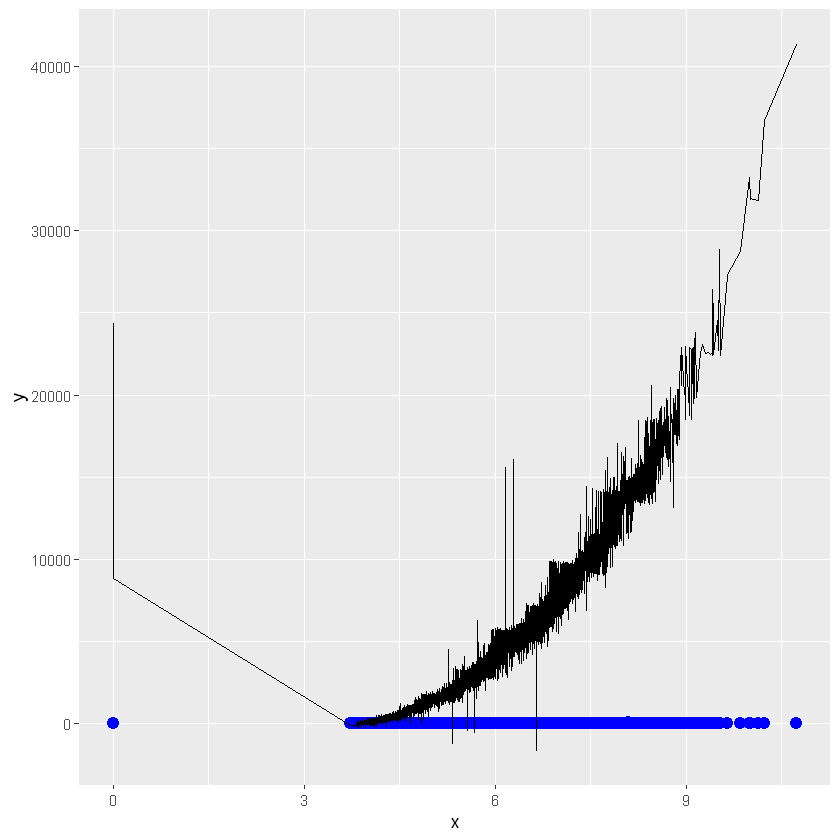

In [45]:
library(glmnet)
library(ggplot2)
library(dplyr)

diamonds$variable2 <- diamonds$x

X <- diamonds %>%
        select(carat, variable2)


X <-as.matrix(X)

formula.lm <- as.formula('y ~ carat + variable2')
model.lm <- glmnet(X,y = diamonds$price, family = 'gaussian', alpha = 0, lambda = 0)

diamonds$pred <- predict(model.lm, newx = X)

# Plot the results
p1 <- ggplot(data = diamonds, aes(x = x, y = y)) + geom_point(color = "blue", size = 3) + geom_line(aes(y=diamonds$pred))
p1

**View Coefficients**

In [46]:
model.lm$beta

2 x 1 sparse Matrix of class "dgCMatrix"
                 s0
carat     10077.253
variable2 -1006.776

# RIDGE REGRESSION WITH GLMNET

In [ ]:
```{r}
library(glmnet)

#Here is a clever way to create the data matrix. This one doesn't require keeping track of which columns contain the features.
X <- model.matrix(formula.lm, data = df)

#Lambda has arbitrarily been set to 0.1. Alpha = 0 implies ridge regression (1 implies lasso and anything between is elasticnet). Also, note that the default is to standardize the features, but the estimated coefficients are on the scale and location of the original values.
model.lm.ridge <- glmnet(X, y = df$y,
                         family = "gaussian",
                         alpha = 0,
                         lambda = 0.1)

# Predict results (so we can plot the line)
df$pred_ridge01 <- predict(model.lm.ridge, newx = X)

# Plot the results
p1 <- ggplot(data = df, aes(x = x, y = y)) + geom_point(color = "blue", size = 3) + geom_line(aes(y=df$pred_ridge01))
p1